In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
machine = pd.read_csv('Equipment data from keggel/PdM_machines.csv')
maintenance = pd.read_csv('Equipment data from keggel/PdM_maint.csv')
telemetry = pd.read_csv('Equipment data from keggel/PdM_telemetry.csv')
failures = pd.read_csv('Equipment data from keggel/PdM_failures.csv')
errors = pd.read_csv('Equipment data from keggel/PdM_errors.csv')



In [ ]:
maintenance['datetimetime'] = pd.to_datetime(maintenance['datetime'])
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
errors['datetime'] = pd.to_datetime(errors['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])

In [ ]:
telemetry_merge = pd.merge(telemetry, machine, on='machineID', how='left')
telemetry_mean = telemetry.groupby('machineID').mean().reset_index()
maintenance_merged = pd.merge(maintenance, machine, on='machineID', how='left')


merged_data_machine_telemetry = pd.merge(machine, telemetry_mean, on='machineID', how='left')
maintenance_count = maintenance.groupby('machineID').size().reset_index(name='maintenance_count')
print(telemetry_merge)

Visualization of Machines maintanace 

In [ ]:
machine_id = 28  # replace with your machine ID
machine_maintenance = maintenance[maintenance['machineID'] == machine_id]


machine_maintenance['datetime'] = pd.to_datetime(machine_maintenance['datetime'])
maintenance_counts = machine_maintenance['datetime'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
maintenance_counts.plot(kind='line')
plt.title(f'Maintenance frequency for machine {machine_id}')
plt.xlabel('Date')
plt.ylabel('Maintenance count')
plt.show()

Visualization of Errors on each machines And Which error happens the most

In [ ]:


# Count the number of errors per machine
error_counts = errors['machineID'].value_counts().reset_index()
error_counts.columns = ['machineID', 'error_count']

# Plotting
plt.figure(figsize=(30, 6))
sns.barplot(x='machineID', y='error_count', data=error_counts, palette='viridis')
plt.title('Number of Errors per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Error Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for the distribution of error types
plt.figure(figsize=(10, 6))
error_type_counts = errors['errorID'].value_counts()
plt.pie(error_type_counts, labels=error_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Error Types')
plt.axis('equal')
plt.show()


Merged table for distrubution chart

In [ ]:
print("Merged Telemetry Data Table:")
print(telemetry_merge.head())
plt.figure(figsize=(14, 8))

Find out frequency of Maintenance, Error by components and Failures by Machine Model

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=maintenance_merged)
plt.title('Frequency of Maintenance Events by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Maintenance Events')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='failure', data=failures)
plt.title('Frequency of Errors by Component')
plt.xlabel('Component')
plt.ylabel('Frequency of Errors')
plt.show()


plt.figure(figsize=(12, 6))
failures_merged = pd.merge(failures, machine, on='machineID', how='left')
sns.countplot(x='model', data=failures_merged)
plt.title('Frequency of Failures by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Failures')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(errors_with_telemetry['volt'],errors_with_telemetry['rotate'], c=errors_with_telemetry['errorID'].notnull(),cmap='viridis',alpha=0.5)
plt.colorbar(label='Error Occurrence')
plt.xlabel('Volt')
plt.ylabel('Rotate')
plt.title('Voltage Vs. Rotation (Colored by Error Occurrence)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'v', '^', 'p']
for error_id, marker in zip(errors_with_telemetry['errorID'].unique(), markers):
    error_data = errors_with_telemetry[errors_with_telemetry['errorID'] == error_id]
    plt.scatter(error_data['pressure'], error_data['vibration'], marker=marker, label=f'Error {error_id}', alpha=0.5)
plt.xlabel('Pressure')
plt.ylabel('Vibration')
plt.title('Pressure vs. Vibration (Different Markers for Error Types)')
plt.legend()
plt.show()


In [ ]:
error_counts = errors.groupby(['machineID','errorID']).size().reset_index(name='error-count')
pivot_table = error_counts.pivot(index='machineID', columns='errorID', values='error-count').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Error Occurance (Heatmap)')
plt.xlabel('Error ID')
plt.ylabel('Machine ID')
plt.show()

# Another model Creation based on second dataset

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [3]:
testdata = './Equipment data from keggel/test.csv'
traindata = './Equipment data from keggel/train.csv'


test = pd.read_csv(testdata)
train = pd.read_csv(traindata)

In [4]:
display(train)
train.isnull().sum()
train.dropna(inplace=True)

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0            0     L50096    L                300.6                    309.6   
1            1     M20343    M                302.6                    312.1   
2            2     L49454    L                299.3                    308.5   
3            3     L53355    L                301.0                    310.9   
4            4     M24050    M                298.0                    309.0   
...        ...        ...  ...                  ...                      ...   
136424  136424     M22284    M                300.1                    311.4   
136425  136425     H38017    H                297.5                    308.5   
136426  136426     L54690    L                300.5                    311.8   
136427  136427     L53876    L                301.7                    310.9   
136428  136428     L47937    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[136429 rows x 14 columns]

In [5]:
# Remove the last 5 rows from the test data
train = train.drop(['Product ID'], axis=1)
display(train)

id Type  Air temperature [K]  Process temperature [K]  \
0            0    L                300.6                    309.6   
1            1    M                302.6                    312.1   
2            2    L                299.3                    308.5   
3            3    L                301.0                    310.9   
4            4    M                298.0                    309.0   
...        ...  ...                  ...                      ...   
136424  136424    M                300.1                    311.4   
136425  136425    H                297.5                    308.5   
136426  136426    L                300.5                    311.8   
136427  136427    L                301.7                    310.9   
136428  136428    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[136429 rows x 13 columns]

In [6]:
# Change the type column to numerical values
train['Type'] = train['Type'].replace({'L': 1, 'M': 2, 'H': 3})
display(train)

id  Type  Air temperature [K]  Process temperature [K]  \
0            0     1                300.6                    309.6   
1            1     2                302.6                    312.1   
2            2     1                299.3                    308.5   
3            3     1                301.0                    310.9   
4            4     2                298.0                    309.0   
...        ...   ...                  ...                      ...   
136424  136424     2                300.1                    311.4   
136425  136425     3                297.5                    308.5   
136426  136426     1                300.5                    311.8   
136427  136427     1                301.7                    310.9   
136428  136428     1                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[136429 rows x 13 columns]

In [7]:
# Feature engneering 
train['Temprature_Diffrence'] = train['Process temperature [K]'] - train['Air temperature [K]']
display(train)

id  Type  Air temperature [K]  Process temperature [K]  \
0            0     1                300.6                    309.6   
1            1     2                302.6                    312.1   
2            2     1                299.3                    308.5   
3            3     1                301.0                    310.9   
4            4     2                298.0                    309.0   
...        ...   ...                  ...                      ...   
136424  136424     2                300.1                    311.4   
136425  136425     3                297.5                    308.5   
136426  136426     1                300.5                    311.8   
136427  136427     1                301.7                    310.9   
136428  136428     1                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  Temprature_Diffrence  
0         0    0    0    0    0                   9.0  
1         0    0    0    0    0                   9.5  
2         0    0    0    0    0                   9.2  
3         0    0    0    0    0                   9.9  
4         0    0    0    0    0                  11.0  
...     ...  ...  ...  ...  ...                   ...  
136424    0    0    0    0    0                  11.3  
136425    0    0    0    0    0                  11.0  
136426    0    0    0    0    0                  11.3  
136427    0    0    0    0    0                   9.2  
136428    0    0    0    0    0                  11.2  

[136429 rows x 14 columns]

In [8]:
# Code that lists where machine failures are happening
machine_failure = train[train['Machine failure'] == 1]

display(machine_failure)

id  Type  Air temperature [K]  Process temperature [K]  \
130        130     1                303.9                    312.8   
164        164     1                302.5                    310.4   
228        228     2                300.7                    309.7   
236        236     1                297.3                    308.6   
247        247     1                303.0                    311.3   
...        ...   ...                  ...                      ...   
135902  135902     1                302.6                    312.1   
135917  135917     1                297.3                    308.2   
135957  135957     1                299.1                    310.6   
136053  136053     3                302.4                    312.0   
136266  136266     1                302.6                    310.5   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
130                       1345         56.5               21                1   
164                       1307         54.8              174                1   
228                       1878         27.9               20                1   
236                       1258         61.8              144                1   
247                       1341         51.0              174                1   
...                        ...          ...              ...              ...   
135902                    1638         35.0              215                1   
135917                    1553         33.5              208                1   
135957                    1353         49.7               74                1   
136053                    1286         62.3              162                1   
136266                    1329         49.7              155                1   

        TWF  HDF  PWF  OSF  RNF  Temprature_Diffrence  
130       0    0    0    0    0                   8.9  
164       0    1    0    0    0                   7.9  
228       0    0    0    0    0                   9.0  
236       0    0    0    1    0                  11.3  
247       0    1    0    0    0                   8.3  
...     ...  ...  ...  ...  ...                   ...  
135902    1    0    0    0    0                   9.5  
135917    1    0    0    0    0                  10.9  
135957    0    0    0    0    0                  11.5  
136053    0    0    1    0    0                   9.6  
136266    0    1    0    0    0                   7.9  

[2148 rows x 14 columns]

# Data visualization

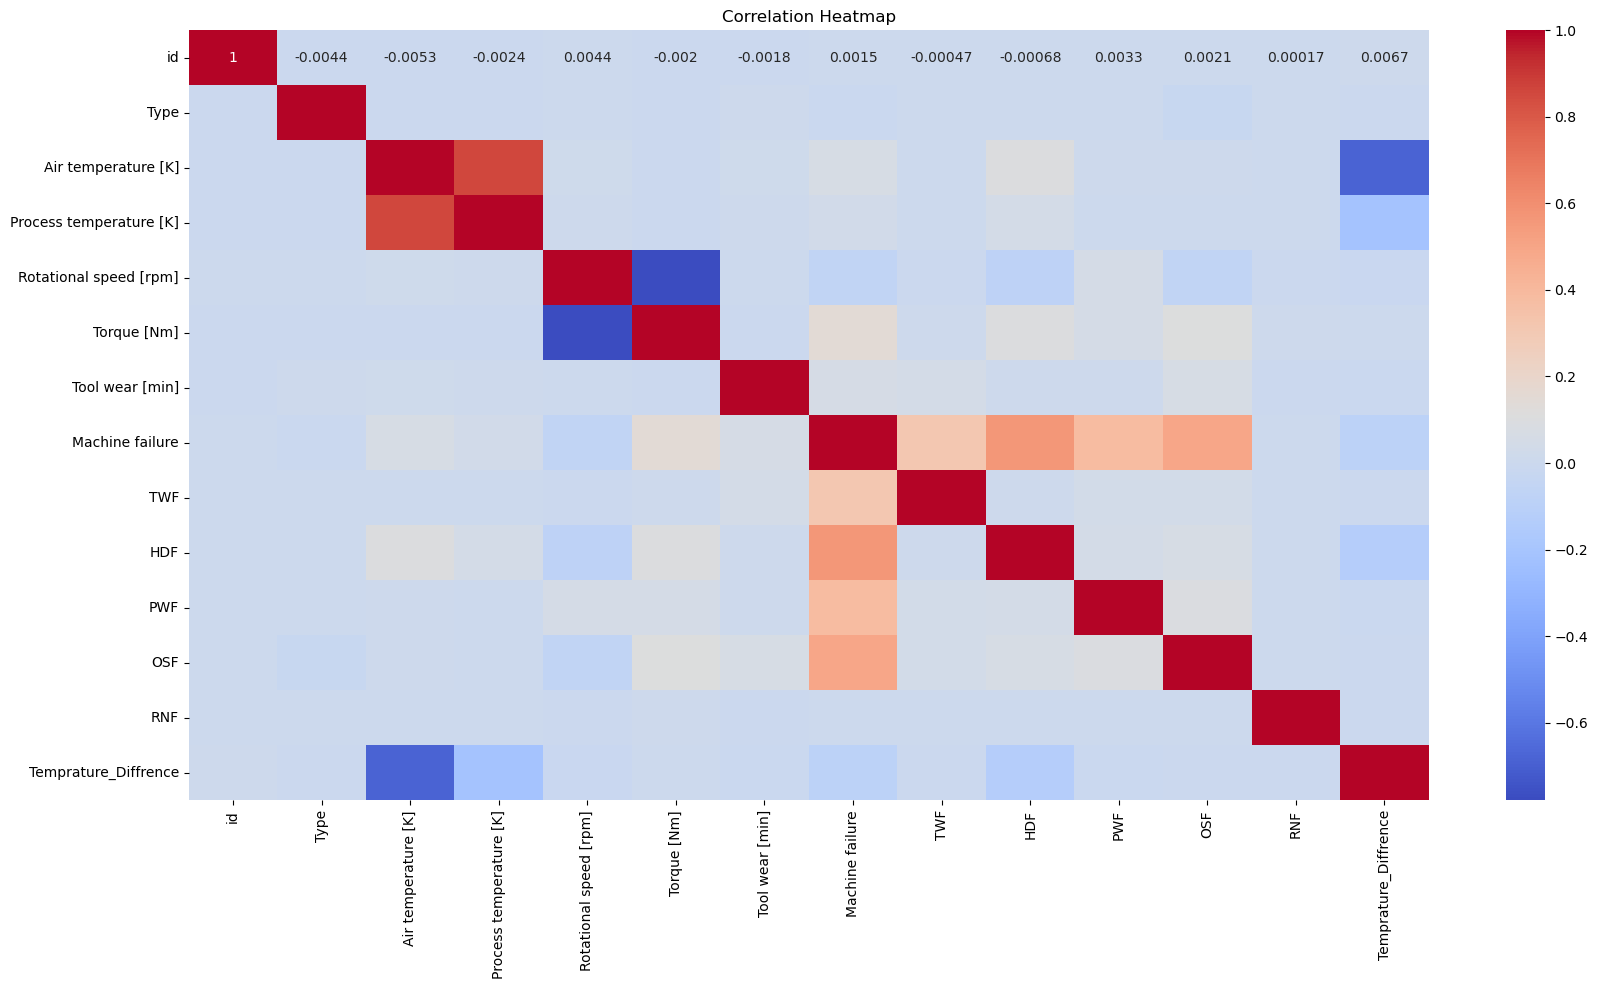

In [9]:
# Ploting the correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True, cmap='coolwarm')
plt.title ('Correlation Heatmap')
plt.show()

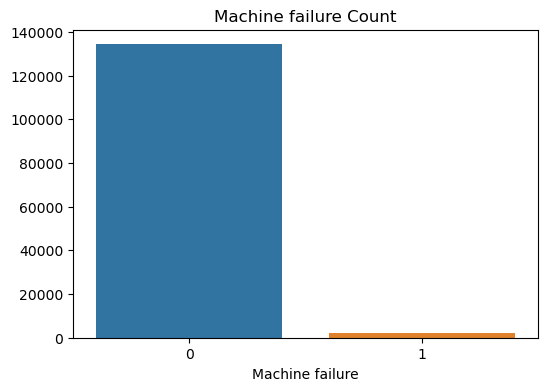

In [10]:
failure_counts = train['Machine failure'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=failure_counts.index, y=failure_counts.values)
plt.title('Machine failure Count')
plt.xlabel('Machine failure')
plt.ylabel
plt.show()

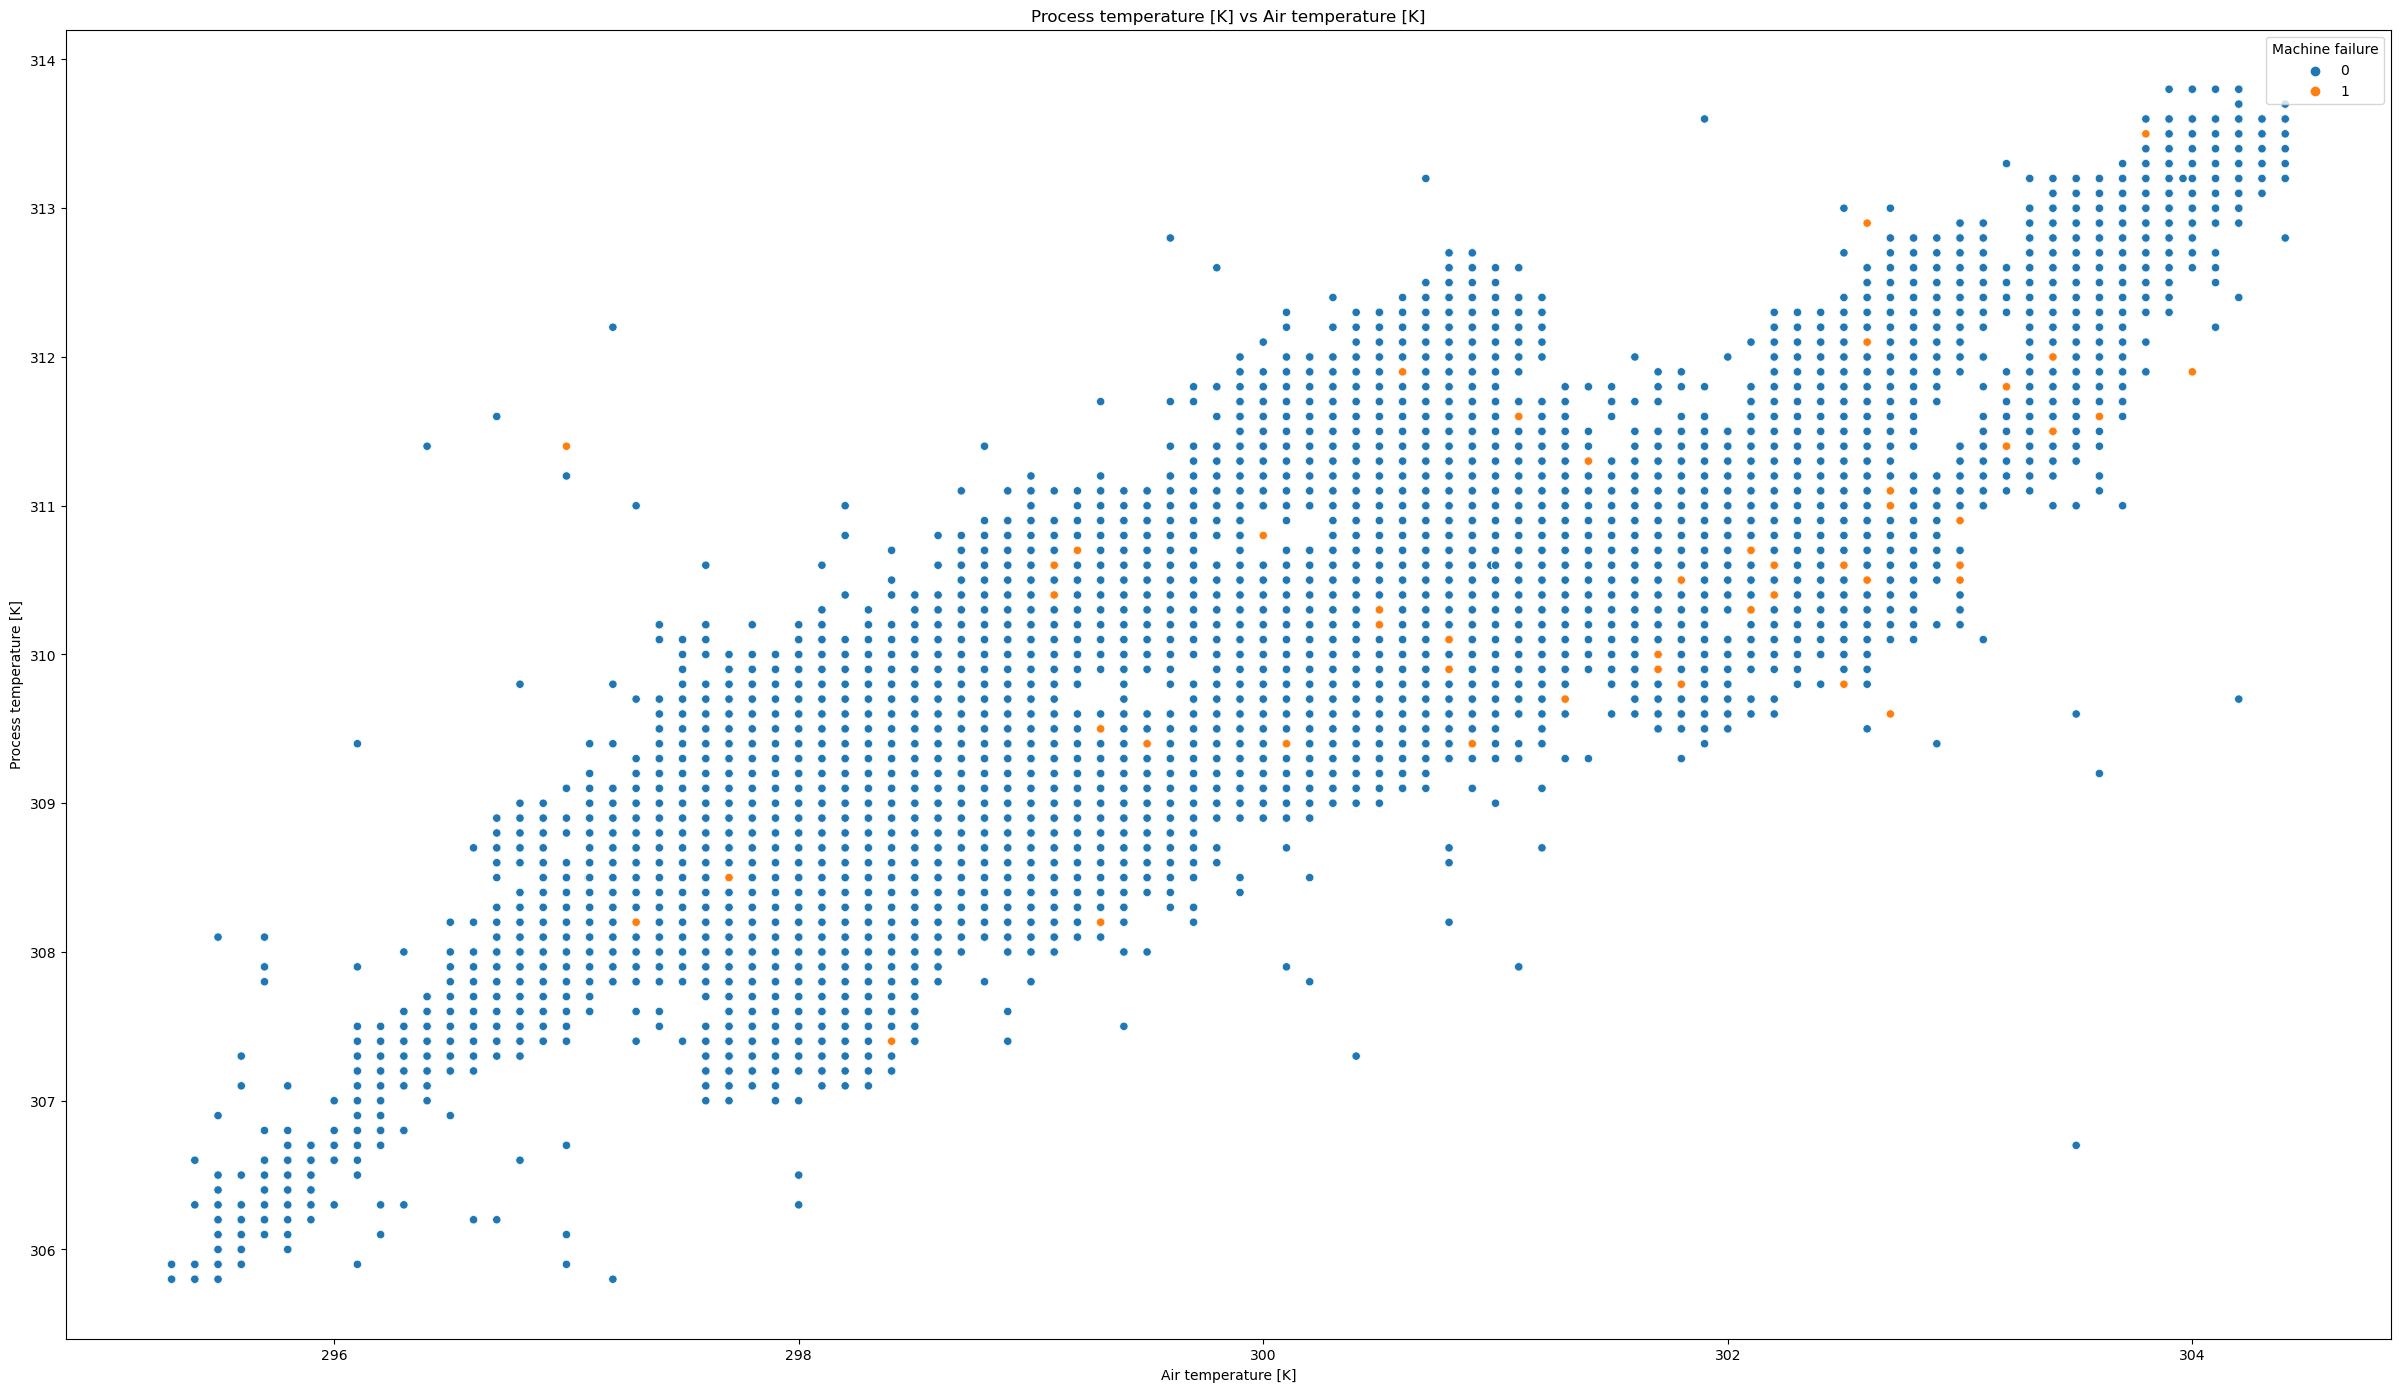

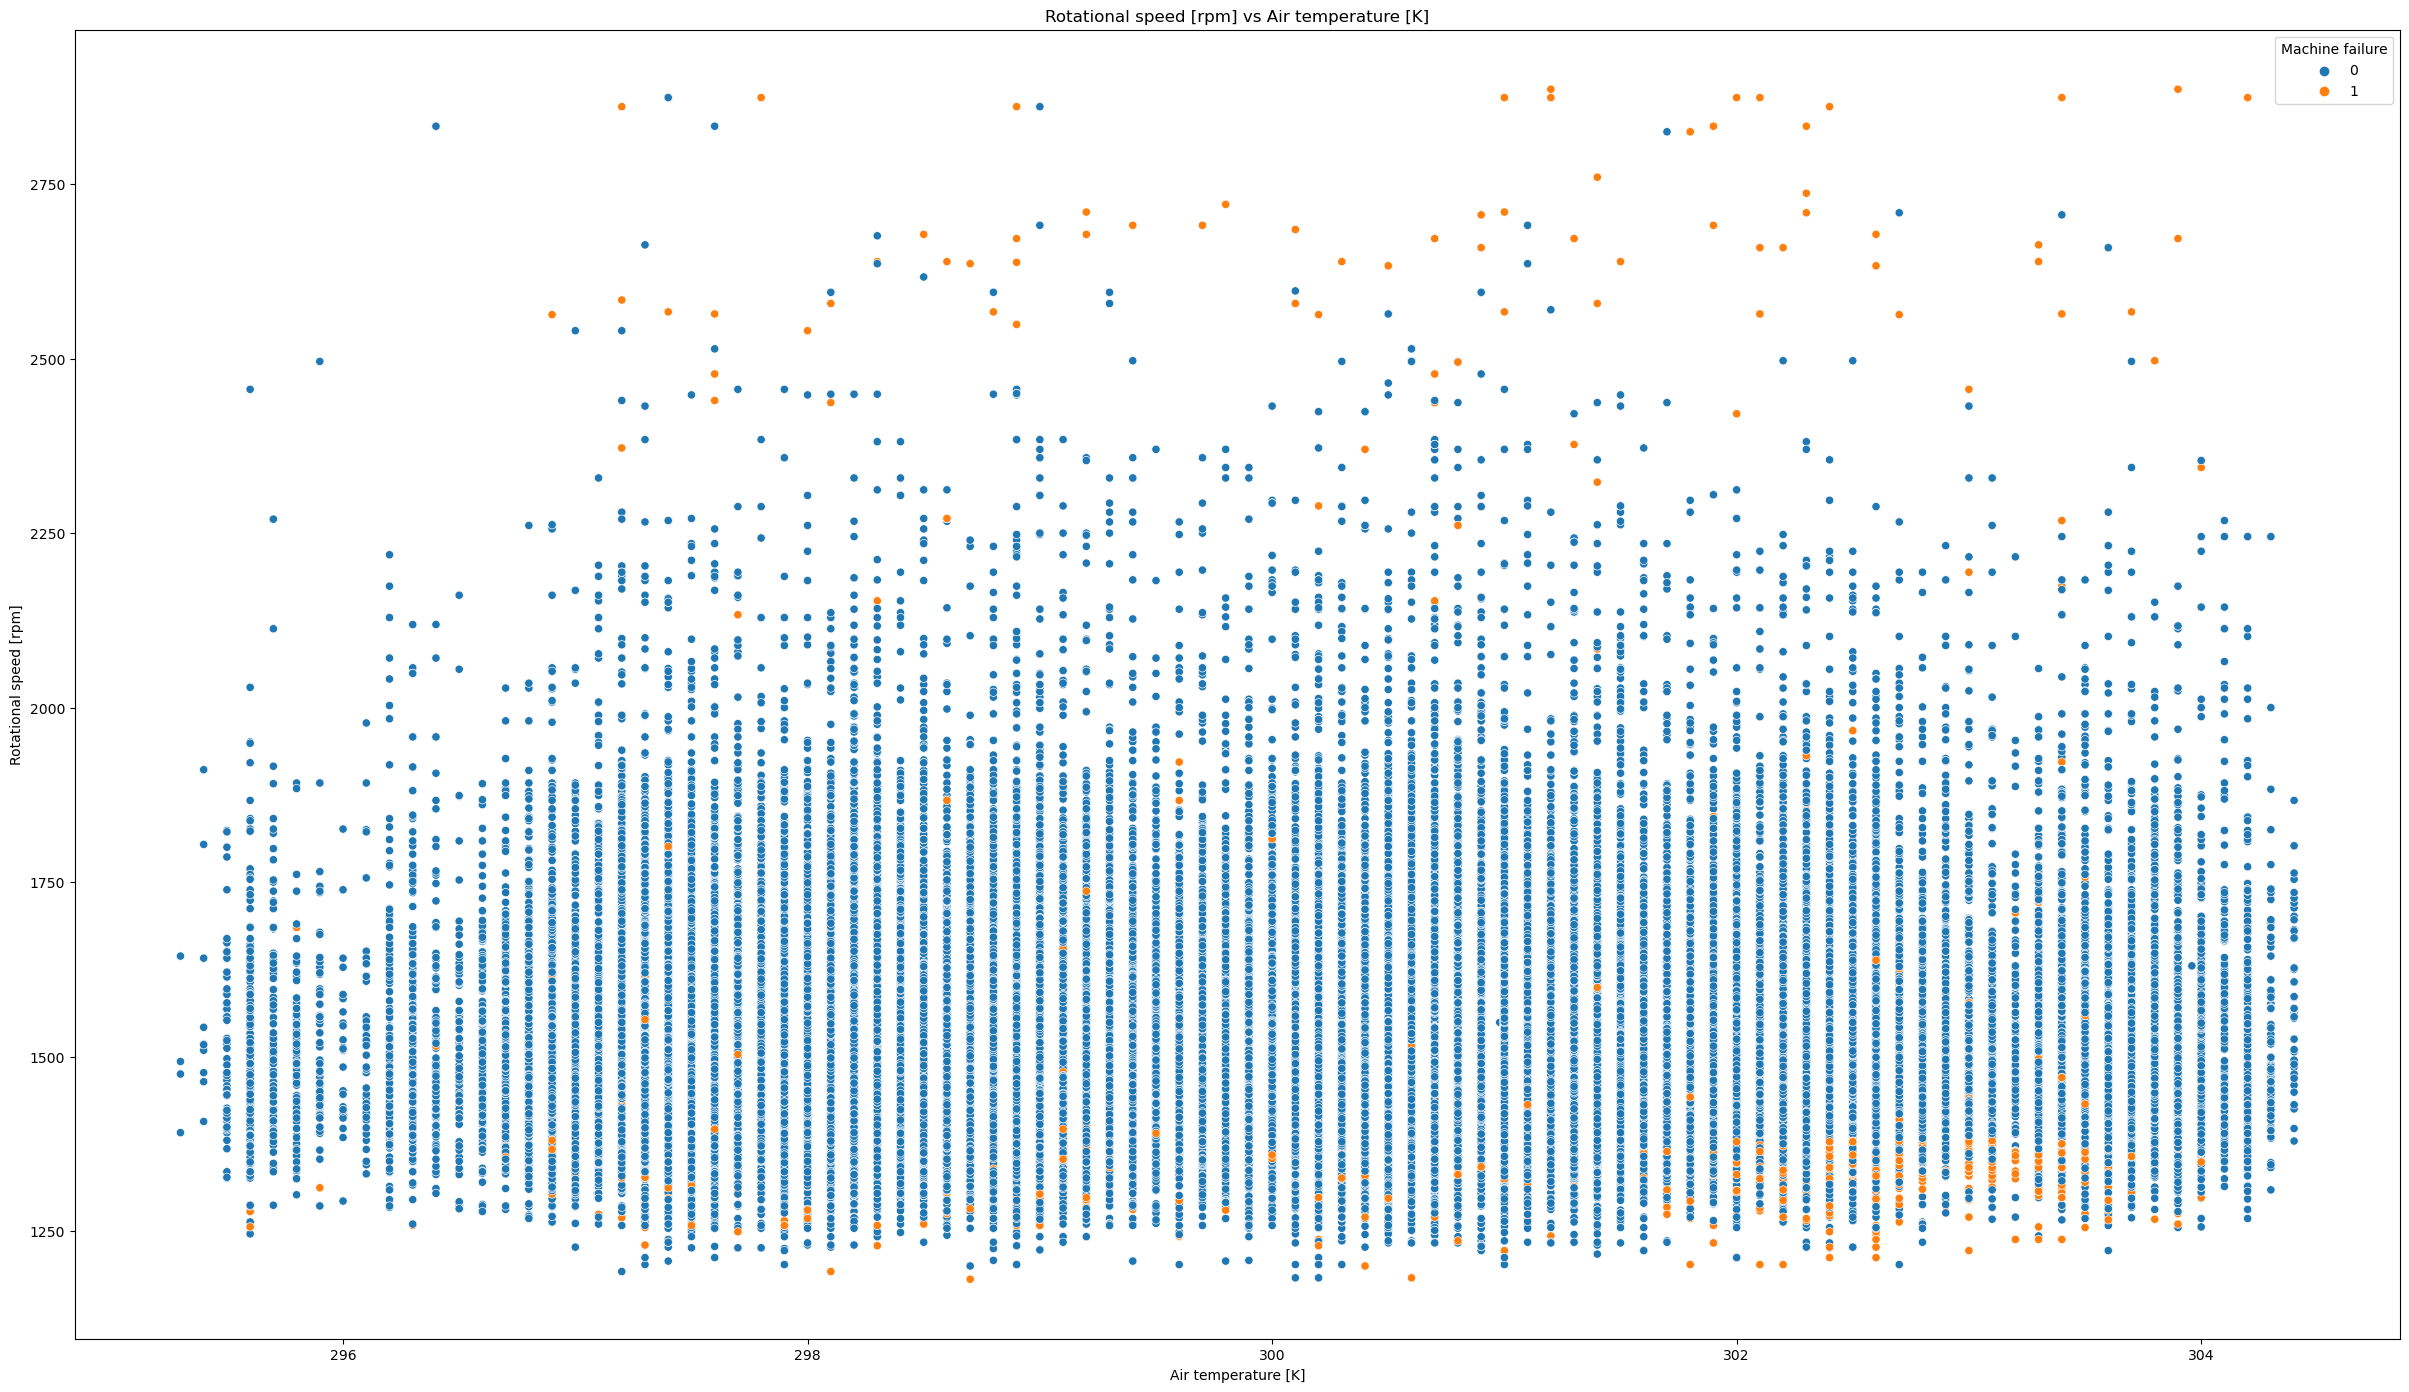

KeyboardInterrupt: 

In [11]:
# Visualization of each feature 
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(30, 17))
        sns.scatterplot(data=train, x=columns[i], y=columns[j], hue='Machine failure')
        plt.title(f'{columns[j]} vs {columns[i]}')
        plt.show()
    

In [12]:
# Visualization of each feature Vs Machine failure together
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
sns.pairplot(train[columns])

c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 3000x2000 with 0 Axes>

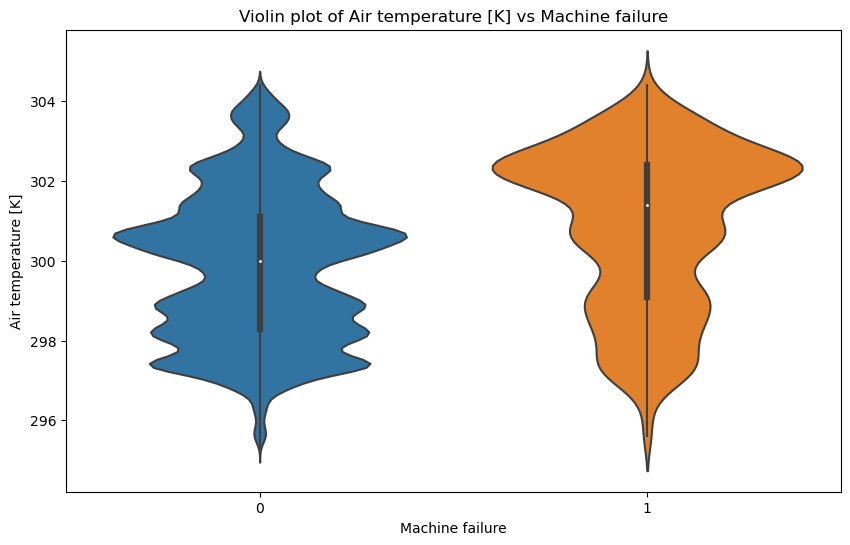

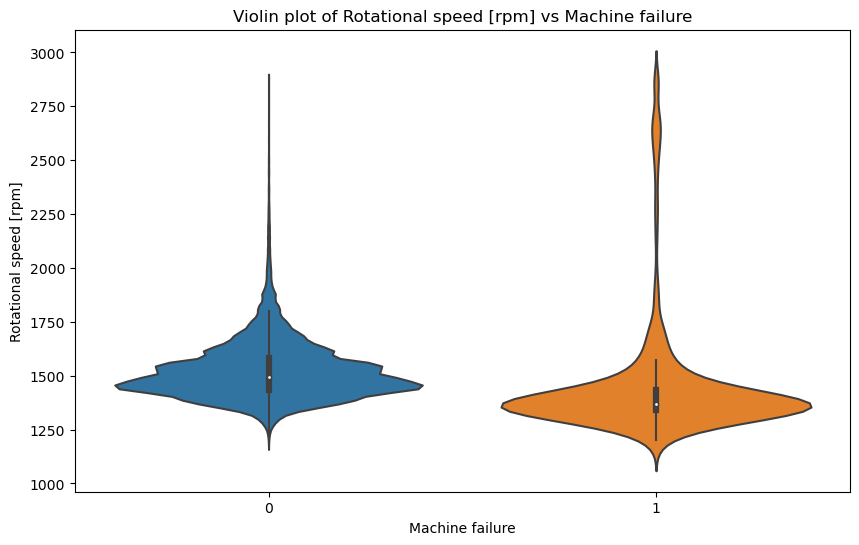

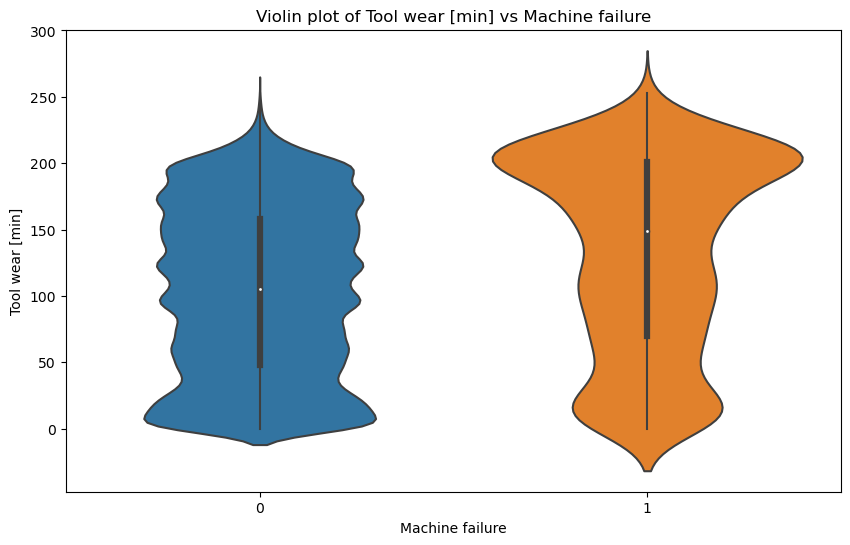

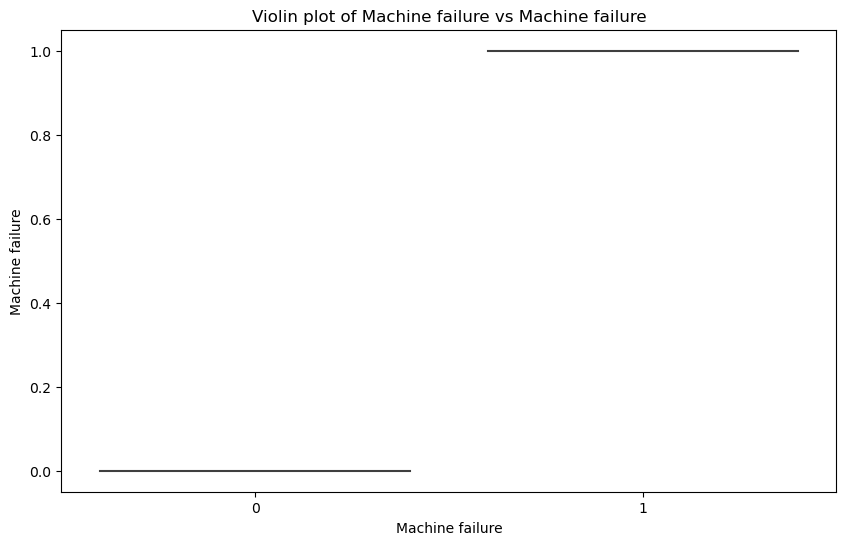

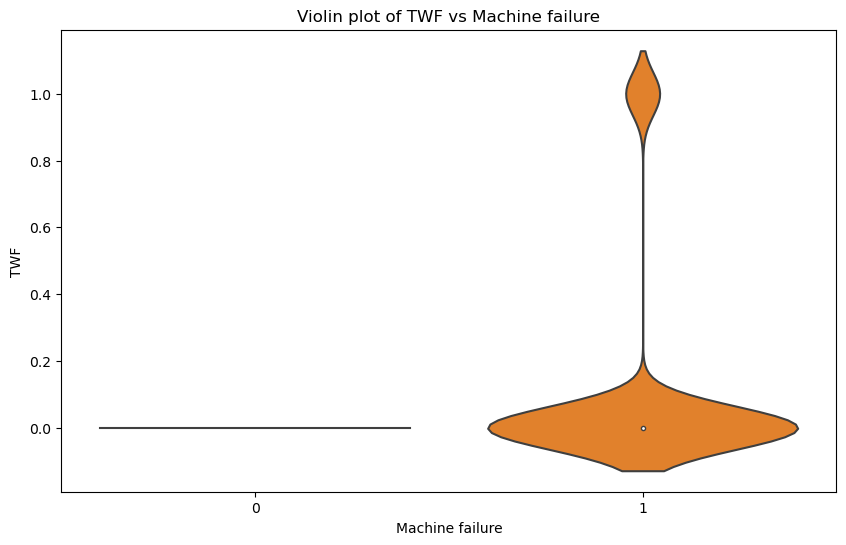

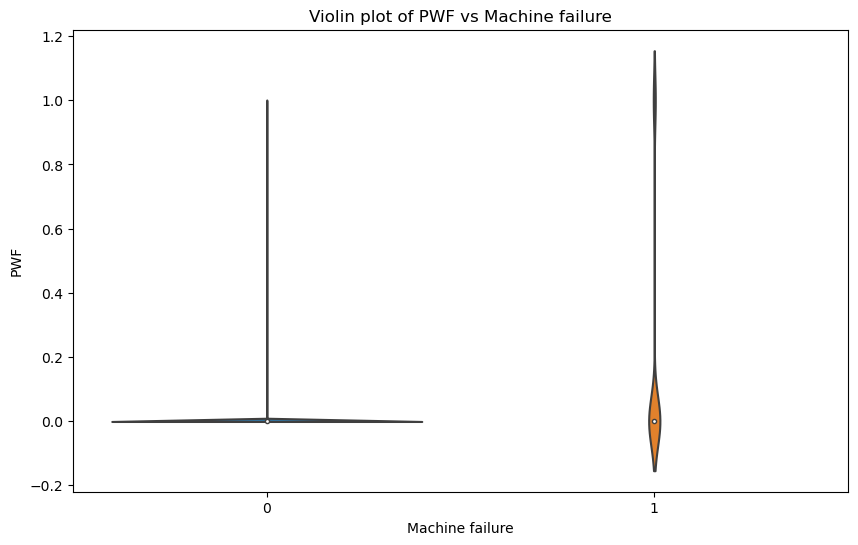

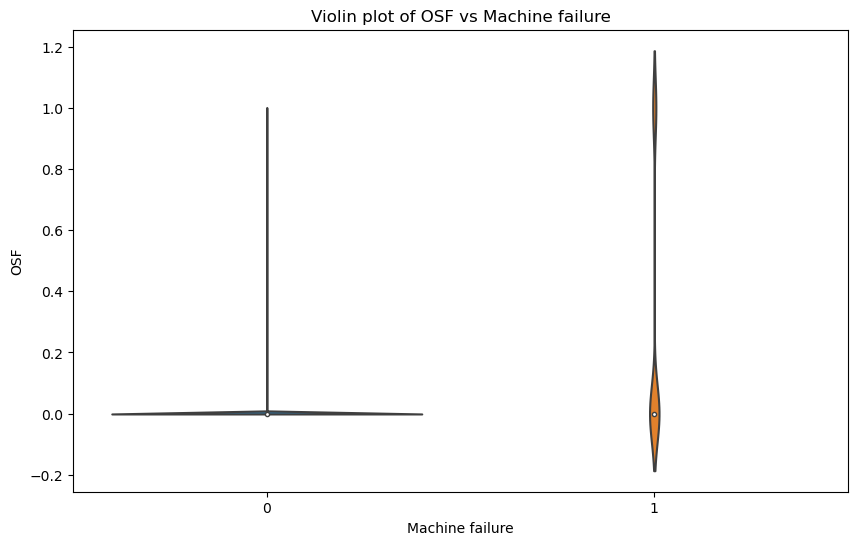

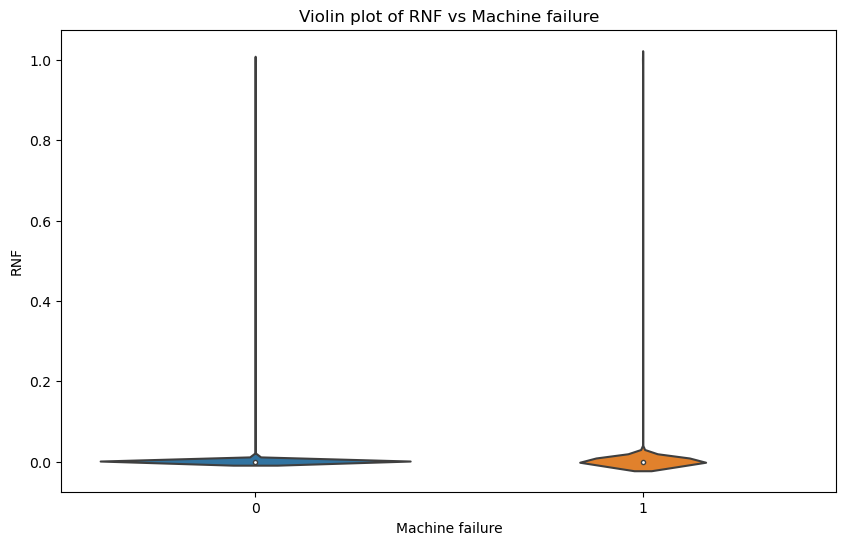

In [13]:
# Violin plot of all the features vs machine failure
plt.figure(figsize=(30, 20))
for i, col in enumerate(train.columns[1:-1]):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Machine failure', y=col, data=train)
    plt.title(f'Violin plot of {col} vs Machine failure')
    plt.xlabel('Machine failure')
    plt.ylabel(col)
    plt.show()


In [ ]:
print(train.columns)

c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x1000 with 0 Axes>

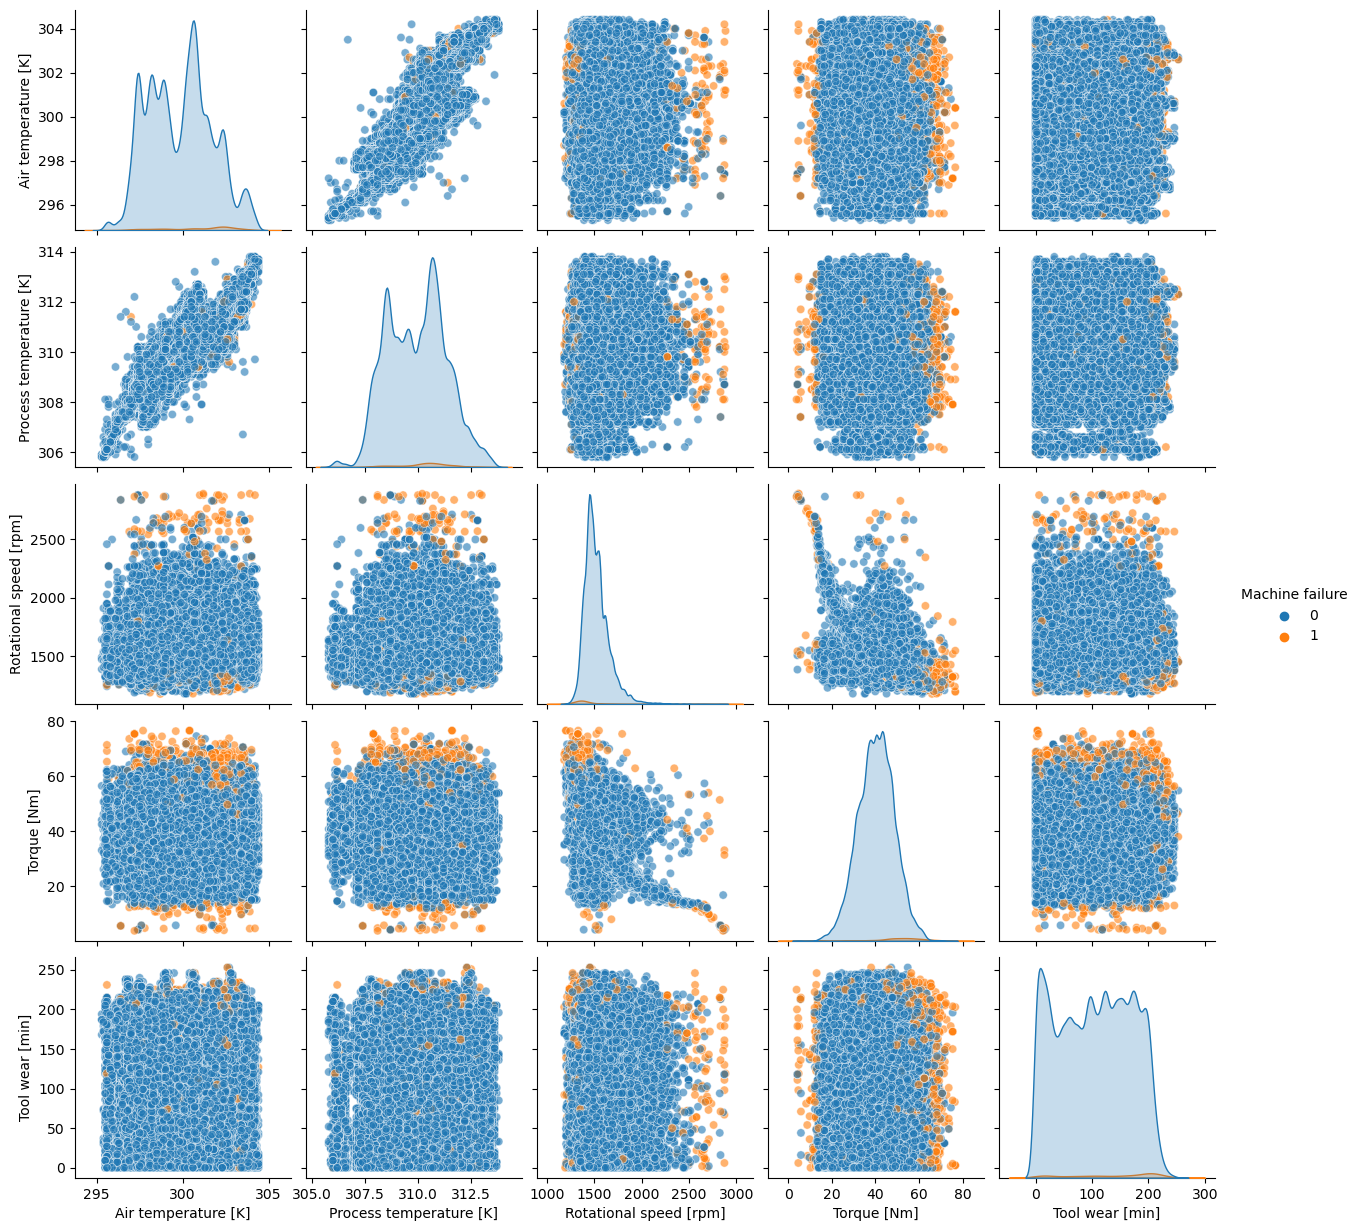

In [14]:
plt.figure(figsize=(12, 10))
sns.pairplot(train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']], hue='Machine failure', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

In [ ]:
# Calculating the Standard Deviation of the features
std = train.std()
print(std)

In [ ]:
# Calculating the Mean of the features
mean = train.mean()
print(mean)

In [25]:
#  Create a model to predict the machine failure using the train data by support vector regression 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = train['Machine failure']
X = train.drop(['Machine failure'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse: .2f}')

Mean Squared Error:  0.02


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')

Accuracy:  0.98


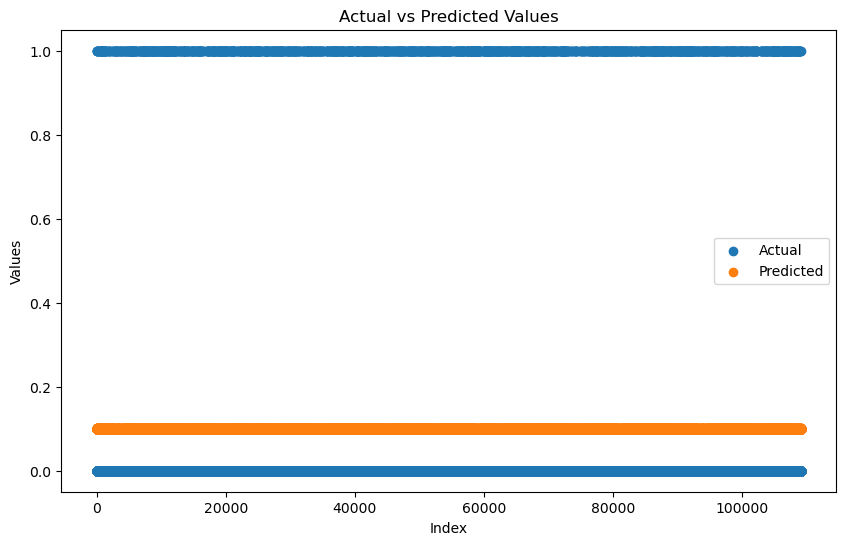

In [27]:
# Scatter plot of the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test.values, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

In [ ]:
# save the model to a file
import pickle 
filename = "Predictive_maintenance_model V2.pkl"
with open(filename, 'wb') as file:
    pickle.dump(svr, file)


# Iteration on making a better model using RFC

In [28]:
# Making the model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

X = train.drop(['Machine failure'], axis=1)
y = train['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')
ValidationScore = rf.score(X_test, y_test)
print(f'Validation Score: {ValidationScore: .2f}')
oob_error = 1 - rf.score(X_train, y_train)
print(f'OOB Error: {oob_error: .2f}')

Accuracy:  1.00
Validation Score:  1.00
OOB Error:  0.00


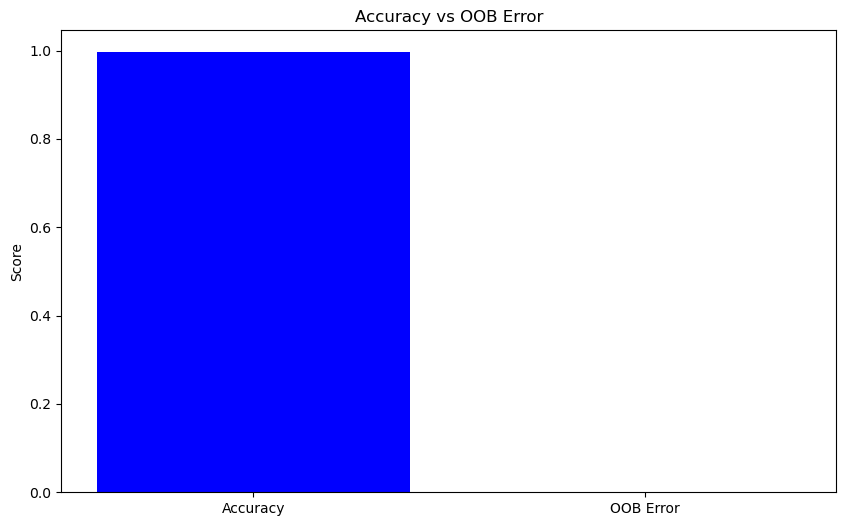

In [29]:
# visualize the OOB error and the accuracy
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'OOB Error'], [accuracy, oob_error], color=['blue', 'red'])
plt.title('Accuracy vs OOB Error')
plt.ylabel('Score')
plt.show()


In [30]:
# Plot the training and validation accuracy/loss as the number of trees in the forest increases.
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_results, 'b', label='Train AUC')
plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend()
plt.show()


In [31]:
# Making the model using Random Forest Classifier
X = train.drop(['Machine failure'], axis=1)
y = train['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf = RandomForestClassifier(n_estimators=75, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')
ValidationScore = rf.score(X_test, y_test)
print(f'Validation Score: {ValidationScore: .2f}')
oob_error = 1 - rf.score(X_train, y_train)
print(f'OOB Error: {oob_error: .2f}')

Accuracy:  1.00
Validation Score:  1.00
OOB Error:  0.00


In [32]:
# Saving the model to a file 
import pickle as pkl
filename = "Predictive_maintenance_model V3.pkl"
with open(filename, 'wb') as file:
    pkl.dump(rf, file)

In [34]:
# Making a model using logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Increase the number of iterations
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')


Accuracy:  1.00
